In [3]:
import os, time
from os.path import exists, join
import re
import cv2
import glob
import numpy as np

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [8]:
def read_grayscale( p ):
    return cv2.imread( p, cv2.IMREAD_GRAYSCALE )

def get_tissue_type(image_path):
    return re.sub('[0-9]*', '', image_path.split(os.sep)[-1].split("_")[-1].split('.')[0] if os.sep in image_path else image_path.split("_")[-1].split('.')[0])

In [9]:
def show_validate_img( title, origin_img, origin_with_label_img, label_img ):
        
    fig           = plt.figure(figsize=(22, 22))
    plt.title(title, fontsize=24)
    
    fig.add_subplot('221').set_title('{}'.format('original image'), fontsize=18)
    plt.imshow(origin_img)
    
    fig.add_subplot('222').set_title('{}'.format('original image with label'), fontsize=18)
    plt.imshow(origin_with_label_img)
    
    fig.add_subplot('223').set_title('{}'.format('label image'), fontsize=18)
    plt.imshow(label_img)
    
#     fig, (a1, a2, a3) = plt.subplots( 1,  3, figsize=(50,50) )
#     plt.title(title)
#     a1.imshow(origin_img)
#     a1.set_title('original image')
#     a2.imshow(origin_with_label_img)
#     a2.set_title('original image with label')
#     a3.imshow(label_img)
#     a3.set_title('label image')
    fig.show()

def validateLabel(selected_dir, dir_name, alpha = 0.3):
    all_images = glob.glob(selected_dir + "/*.png")
#     print(all_images)
    
    original_img_name = "%s.jpg" % dir_name
    original_img_path = join( selected_dir , original_img_name )
    try:
        original_img = cv2.cvtColor( cv2.imread( original_img_path, cv2.IMREAD_COLOR ) , cv2.COLOR_BGR2RGB )
        overlay = original_img.copy() 
        output = original_img.copy()
    except Exception as e:
        print("Error: {}, {}".format(dir_name, e))
        return 
    merge_tissue = np.zeros_like(original_img)     
    
    for index, img_path in enumerate(all_images):
        
        tissue_img = read_grayscale( img_path )
        
        img_name = img_path.split(os.sep)[-1]
        tissue_color = tissue_colors[get_tissue_type(img_name)]
        if not 'empty' in img_name:
            merge_tissue[tissue_img > 0] = tissue_color
            overlay[tissue_img > 0] = tissue_color
            
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)
    show_validate_img('dir name: {}'.format(dir_name), original_img, output, merge_tissue)
    plt.show()



In [11]:
image_dir = join( os.getcwd(), 'set8')

tissue_colors = {
    'background':(0, 0, 0), 
    'empty':(0, 0, 0), 
    'necrosis':(255, 0, 255), 
    'granulation':(230, 0, 0), 
    'slough': (255, 255, 102),  
    'epithelial': (255, 153, 102)}




Validate Label Start at: 2.109375

1/29: 100522


c:\python35\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


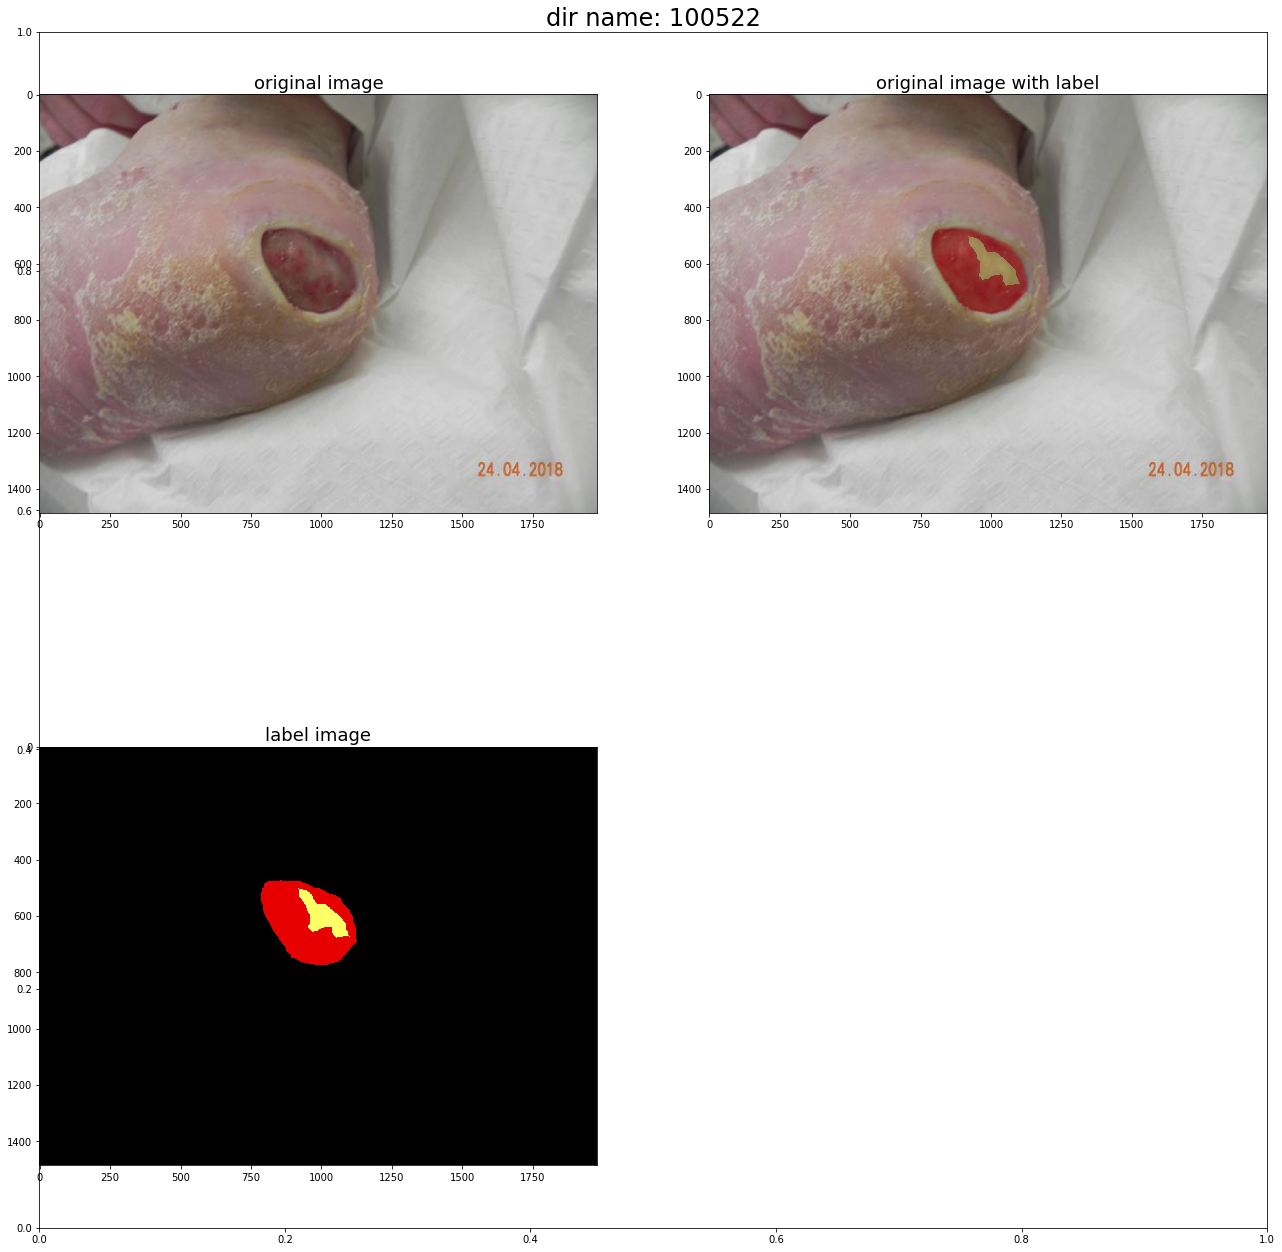

None: 1.890625

2/29: 100523


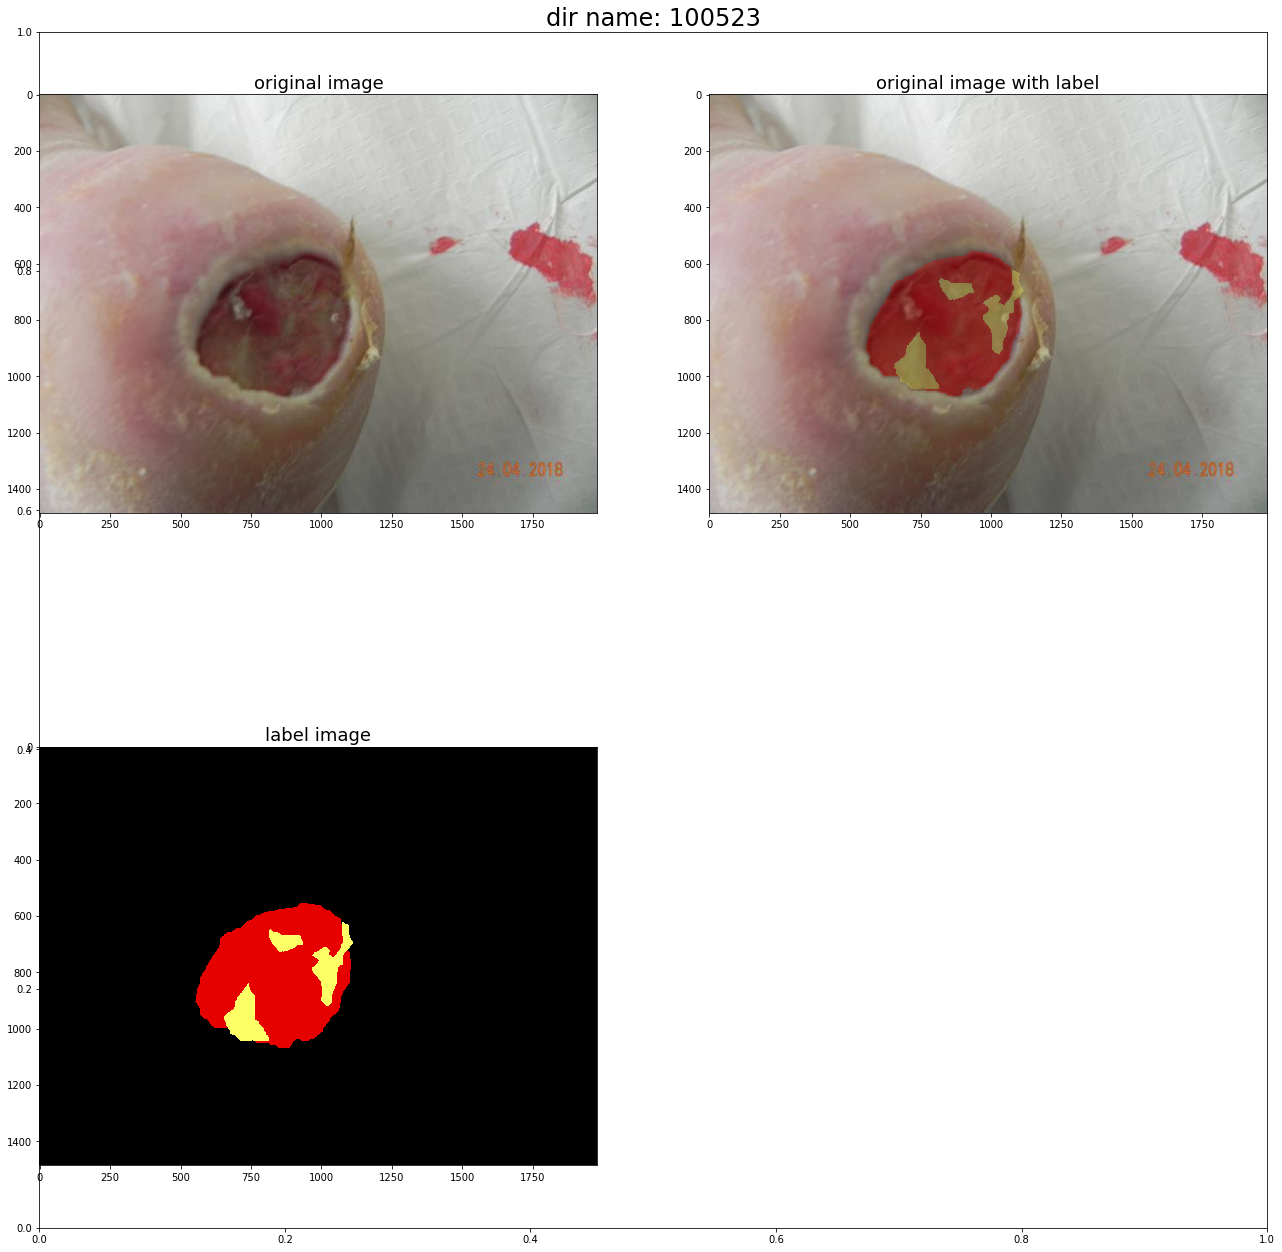

None: 3.828125

END 3.84375


In [12]:
start_time = time.process_time()
print('Validate Label Start at: %s\n' %start_time)
for root, dirs, files in os.walk(image_dir):
    if(root == tmp_dir):
        for i, sub_dir in enumerate(dirs[:2]):
            print("{}/{}: {}".format(i+1, len(dirs), sub_dir))
            if not sub_dir.isdecimal():
                next

            full_sub_dir = join(root, sub_dir)
            response = validateLabel(full_sub_dir, sub_dir)

            print("{}: {}\n".format(response, time.process_time() - start_time))
            
print("END", time.process_time() - start_time)